In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tabulate
from  matplotlib.ticker import FuncFormatter
import os
from pathlib import Path

sns.set_style("whitegrid")
pd.set_option("styler.format.decimal", ",")
pd.set_option("styler.format.precision", 2)
pd.set_option("styler.format.na_rep", "–")
cm = plt.cm.YlOrRd

subdirectory = Path("assets")
subdirectory.mkdir(exist_ok=True)

def write_figure(the_name):
    plt.savefig(subdirectory / f"figure-{the_name}.svg")

def write_table(df, the_name, caption="", heatmap=False, axis=None):
    style = df.style if not heatmap else df.style.background_gradient(axis=axis, cmap=cm)
    with (subdirectory / f"table-{the_name}.tex").open(mode="w") as f:
        f.write(
            (style).highlight_null(props="background-color:white; color:white;").to_latex(
                convert_css=True, 
                hrules=True,
                sparse_index=False,
                environment="longtable", 
                position="!hbt", 
                caption=caption, 
                label="tbl:"+the_name
            )
        )
    with (subdirectory / f"table-{the_name}.html").open(mode="w") as f:
        f.write((style).highlight_null(props="opacity:0").to_html(sparse_index=False))
    with (subdirectory / f"table-{the_name}.md").open(mode="w") as f:
        if caption:
            f.write(f"Table: {caption}\n\n")
        f.write(df.to_markdown(floatfmt=".2f").replace("nan", "\u00a0").replace(".00", "   ").replace(".", ",")) #ma

In [2]:
print("ⲟⲩϫⲁⲓ ⲡⲕⲟⲥⲙⲟⲥ!")

ⲟⲩϫⲁⲓ ⲡⲕⲟⲥⲙⲟⲥ!


## Transliteration from Greek to Coptic

In [3]:
import unicodedata
import re

greek_to_coptic = {
  'α': 'ⲁ',
  'β': 'ⲃ',
  'γ': 'ⲅ', 
  'δ': 'ⲇ',
  'ε': 'ⲉ',
  'ζ': 'ⲍ',
  'η': 'ⲏ',
  'θ': 'ⲑ',
  'ι': 'ⲓ',
  'κ': 'ⲕ',
  'λ': 'ⲗ',
  'μ': 'ⲙ',
  'ν': 'ⲛ',
  'ξ': 'ⲝ',
  'ο': 'ⲟ',
  'π': 'ⲡ',
  'ρ': 'ⲣ',
  'σ': 'ⲥ',
  'τ': 'ⲧ',
  'υ': 'ⲩ',
  'φ': 'ⲫ',
  'χ': 'ⲭ',
  'ψ': 'ⲯ',
  'ω': 'ⲱ',
  'ς': 'ⲥ',
  'ϗ': 'ⳤ',
  '\u0314': 'ϩ',
  '\u0345': 'ⲓ',
}

greek_to_coptic_ord = {ord(greek): ord(coptic) for greek, coptic in greek_to_coptic.items()}

def transliterate(greek):
    normalized = unicodedata.normalize("NFD", greek)
    clean_spiritus_asper = lambda x: re.sub(r"^([ⲣⲁⲉⲏⲓⲟⲱⲩ]+)ϩ", r'ϩ\1', x)
    return clean_spiritus_asper(
        "".join(
            greek_to_coptic[character.lower()]
            for character in normalized
            if character.lower() in greek_to_coptic
        )
    )

In [4]:
transliterate("ῥᾳδίως")

'ϩⲣⲁⲓⲇⲓⲱⲥ'

In [5]:
df = pd.read_csv(os.getenv("ATTESTATIONS_CSV"))
df = df.set_index("id")

/tmp/ipykernel_73021/912060916.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.getenv("ATTESTATIONS_CSV"))


In [6]:
df

,quote_coptic,quote_english,orthography,encoding,coptic_lemma_id,coptic_lemma,coptic_lemma2,greek_lemma_id,greek_lemma,dialect,...,manuscript_text,earliest,latest,?,collection,material,dialectCode,dialect_group,code,name
id,,,,,,,,,,,,,,,,,,,,,
30,ⲛⲉⲟⲩⲁⲗⲉ[ⲕⲧ]ⲱⲣ ⲙⲟⲩⲧⲉ ⲙⲡⲁⲧⲕⲣ^[ⲁⲣ]ⲛⲁ^ ⲙⲙⲁⲉⲓ ⲛϣⲁⲙⲧ...,A rooster will not crow until you have ^denied...,[ⲁⲣ]ⲛⲁ,vb.ny-cr.auxy.obn,371,ⲁⲣⲛⲁ,ⲁⲣⲛⲁ,274,ἀρνέομαι,L5,...,Cambridge - Bible Society's Library pap. Q - G...,200.0,299.0,NaN,Cambridge - Bible Society's Library pap. Q,Papyrus,L5,Lycopolitan Dialects,L5,NaN
71613,ⲛⲉϥϩⲏⲛ ^ⲇⲉ^ ⲁϩⲟⲩⲛ ϫⲓ ⲡⲡⲁⲥⲭⲁ | ⲛ̄ⲛⲓⲟⲩⲧⲁⲉⲓ⸱ ⲁⲩⲱ ...,[…] ^and^ the passover of the Jews was approac...,ⲇⲉ,2fun,572,ⲇⲉ,ⲇⲉ,458,δέ,L5,...,Cambridge - Bible Society's Library pap. Q - G...,200.0,299.0,NaN,Cambridge - Bible Society's Library pap. Q,Papyrus,L5,Lycopolitan Dialects,L5,NaN
71614,ⲛⲉϥϩⲏⲛ ⲇⲉ ⲁϩⲟⲩⲛ ϫⲓ ⲡ^ⲡⲁⲥⲭⲁ^ ⲛ̄ⲛⲓⲟⲩⲧⲁⲉⲓ⸱ ⲁⲩⲱ ⲁⲓ...,[…] and the ^passover^ of the Jews was approac...,ⲡⲁⲥⲭⲁ,nn.m.sg.dtd,1907,ⲡⲁⲥⲭⲁ,ⲡⲁⲥⲭⲁ,1689,πάσχα,L5,...,Cambridge - Bible Society's Library pap. Q - G...,200.0,299.0,NaN,Cambridge - Bible Society's Library pap. Q,Papyrus,L5,Lycopolitan Dialects,L5,NaN
71615,ⲛⲉϥϩⲏⲛ ⲇⲉ ⲁϩⲟⲩⲛ ϫⲓ ⲡⲡⲁⲥⲭⲁ ⲛ̄ⲛ^ⲓⲟⲩⲧⲁⲉⲓ^⸱ ⲁⲩⲱ ⲁⲓ...,[…] and the passover of the ^Jews^ was approac...,ⲓⲟⲩⲧⲁⲉⲓ,nn.gen0.pl.dtd,1117,ⲓⲟⲩⲇⲁⲓ,ⲓⲟⲩⲇⲁⲓ,958,Ἰουδαῖος,L5,...,Cambridge - Bible Society's Library pap. Q - G...,200.0,299.0,NaN,Cambridge - Bible Society's Library pap. Q,Papyrus,L5,Lycopolitan Dialects,L5,NaN
71616,ⲁϥϭⲓ|ⲛⲉ ⲙ̄ⲙⲁⲩ ϩ︦ⲛ︦ ⲡ︦ⲣ︦ⲡⲉⲉ ⲉⲩϯ ⲁ|ⲃⲁⲗ ⲛ̄ⲛⲉϩⲁⲩ ⲙ...,He found them in the temple.selling oxen and s...,[ⲧⲣⲁ|ⲡⲉ]ⲍⲓⲧⲏⲥ,nn.gen0.pl.dtd,2477,ⲧⲣⲁⲡⲉⲍⲓⲧⲏⲥ,ⲧⲣⲁⲡⲉⲍⲓⲧⲏⲥ,2206,τραπεζίτης,L5,...,Cambridge - Bible Society's Library pap. Q - G...,200.0,299.0,NaN,Cambridge - Bible Society's Library pap. Q,Papyrus,L5,Lycopolitan Dialects,L5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201060,ⲁⲩⲱ ⲡⲙⲉⲣⲓⲧ⳿ ⲉϥⲟ̂ ⲛ̄ⲑⲉ ⲛ̄ⲟⲩϣⲏⲣⲉ ⲙ̄^ⲙⲟⲙⲟⲕⲉⲣⲱⲥ^,and the beloved is like a ^unicorn^'s young,ⲙⲟⲙⲟⲕⲉⲣⲱⲥ,nn.gen0.num0.dt0.cnst3,4283,ⲙⲟⲛⲟⲕⲉⲣⲱⲥ,ⲙⲟⲛⲟⲕⲉⲣⲱⲥ,5093,μονόκερως,S,...,Nagel 2022b - - Psalms,NaN,NaN,NaN,Nagel 2022b -,NaN,S,Sahidic Dialects,S,Sahidic
201061,[…] ⲛ̄ϥϩⲁⲣⲉϩ ⲉⲣⲟϥ ⲉ̣ϥϥⲓ ⲙⲡⲣⲟⲟⲩϣ ⲛⲛⲉϥⲉⲕⲕⲗⲏⲥⲓⲁ ⲉ...,[…] and that He may protect him as he takes ca...,ⲕⲁⲑⲩⲡⲟⲧⲁⲥⲥⲉ,vb.cnj.auxy.obn,7381,ⲕⲁⲑⲩⲡⲟⲧⲁⲥⲥⲉ,ⲕⲁⲑⲩⲡⲟⲧⲁⲥⲥⲉ,5582,καθυποτάσσω,S,...,Khartum - National Museum 24338 - Foundation i...,700.0,719.0,AD 707 Aug 28,Khartum - National Museum 24338,Sandstone,S,Sahidic Dialects,S,Sahidic
201062,[…] ϩⲓⲧⲛ̄ ⲧⲙ̅ⲛⲧϥⲁⲓⲣⲟⲟⲩϣ ⲁⲩⲱ ⲛⲣⲉϥⲉⲡⲓⲑⲩⲙⲉⲓ ⲉⲛⲁⲡⲛ...,[…] through the care and the desire for the th...,ⲡⲣⲟⲉⲇⲣⲟⲥ,nn.m.sg.dtd,7382,ⲡⲣⲟⲉⲇⲣⲟⲥ,ⲡⲣⲟⲉⲇⲣⲟⲥ,5586,πρόεδρος,S,...,Khartum - National Museum 24338 - Foundation i...,700.0,719.0,AD 707 Aug 28,Khartum - National Museum 24338,Sandstone,S,Sahidic Dialects,S,Sahidic


In [7]:
df[["manuscript_text", "earliest", "latest"]].set_index("manuscript_text").drop_duplicates()

,earliest,latest
manuscript_text,,
Cambridge - Bible Society's Library pap. Q - Gospel of John,200.0,299.0
Papyrus Nag Hammadi C 002 - Genesis,200.0,399.0
London - British Library Or 4919(5) - Lamentations,NaN,NaN
Leipzig - Universität - Papyrus- und Ostrakasammlung P.Lips. Inv. 2299 - Exodus Apocryphon,200.0,499.0
Moscow - Pushkin Museum I.1.b.523 - P.MoscowCopt 90,200.0,1119.0
...,...,...
Berlin - Ägyptisches Museum P. 8324 - BKU I 18 (Healing amulet),NaN,699.0
London - British Library Or. 5525 - P.Lond.Copt. 1 524 (magical text to protect a woman and her children),NaN,899.0
London - British Library Or. 6800 - Colophon with prayer for Mena bishop of Keft,1000.0,1033.0


In [8]:
df[df["manuscript_text"] == "London - British Library Add MS 5114 - Pistis Sophia, Book 2"]

,quote_coptic,quote_english,orthography,encoding,coptic_lemma_id,coptic_lemma,coptic_lemma2,greek_lemma_id,greek_lemma,dialect,...,manuscript_text,earliest,latest,?,collection,material,dialectCode,dialect_group,code,name
id,,,,,,,,,,,,,,,,,,,,,
128794,ⲡⲙⲉϩⲥⲛⲁⲩ ⲛ̄^ⲧⲟⲙⲟⲥ^ ⲛ̄ⲧⲡⲓⲥⲧⲓⲥ ⲥⲟⲫⲓⲁ \,NaN,ⲧⲟⲙⲟⲥ,nn.m-env.sg-env.dtd-env.cnst25-o,2466,ⲧⲟⲙⲟⲥ,ⲧⲟⲙⲟⲥ,2197,τόμος,S,...,London - British Library Add MS 5114 - Pistis ...,NaN,NaN,NaN,NaN,NaN,S,Sahidic Dialects,S,Sahidic
128803,ⲡⲙⲉϩⲥⲛⲁⲩ ⲛ̄ⲧⲟⲙⲟⲥ ⲛ̄ⲧⲡⲓⲥⲧⲓⲥ ^ⲥⲟⲫⲓⲁ^ \,NaN,ⲥⲟⲫⲓⲁ,nn.gen0.num0.dt0,2244,ⲥⲟⲫⲓⲁ,ⲥⲟⲫⲓⲁ,2007,σοφία,S,...,London - British Library Add MS 5114 - Pistis ...,NaN,NaN,NaN,NaN,NaN,S,Sahidic Dialects,S,Sahidic
129023,ⲁϥⲉⲓ⳿ ϩⲱⲱϥ ⲉⲑⲏ ⲛ̄ϭⲓ ⲓ̈ⲱϩⲁⲛⲛⲏⲥ ⲡⲉϫⲁϥ ϫⲉ ⲡϫⲟⲉⲓⲥ ...,NaN,ⲕⲉⲗⲉⲩⲉ,NaN,1268,ⲕⲉⲗⲉⲩⲉ,ⲕⲉⲗⲉⲩⲉ,1102,κελεύω,S,...,London - British Library Add MS 5114 - Pistis ...,NaN,NaN,NaN,NaN,NaN,S,Sahidic Dialects,S,Sahidic
129024,ⲁϥⲉⲓ⳿ ϩⲱⲱϥ ⲉⲑⲏ ⲛ̄ϭⲓ ⲓ̈ⲱϩⲁⲛⲛⲏⲥ ⲡⲉϫⲁϥ ϫⲉ ⲡϫⲟⲉⲓⲥ ...,NaN,ⲡⲣⲟⲫⲏⲧⲉⲩⲉ,vb.1prf-rl.auxn.ob1.ob11,2939,ⲡⲣⲟⲫⲏⲧⲉⲩⲉ,ⲡⲣⲟⲫⲏⲧⲉⲩⲉ,2576,προφητεύω,S,...,London - British Library Add MS 5114 - Pistis ...,NaN,NaN,NaN,NaN,NaN,S,Sahidic Dialects,S,Sahidic
129025,ⲁϥⲟⲩⲱϣ︦ⲃ︦ ^ⲇⲉ^ ⲛ̄ϭⲓ ⲓ︦[ⲏⲥⲟⲩ]ⲥ︦ ⲡⲉϫⲁϥ ⲛ̄ⲓ̈ⲱϩⲁⲛⲛ...,NaN,ⲇⲉ,2fun,572,ⲇⲉ,ⲇⲉ,458,δέ,S,...,London - British Library Add MS 5114 - Pistis ...,NaN,NaN,NaN,NaN,NaN,S,Sahidic Dialects,S,Sahidic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142658,ⲧⲉ^ⲅⲛⲱⲥⲓⲥ^ ⲅⲁⲣ ⲙ̄ⲡⲥⲟⲟⲩⲛ ⲙ̄ⲡⲓⲁⲧ\ϣⲁϫⲉ ⲉⲣⲟ[ϥ] ⲛ̄ⲧ...,For the ^gnosis^ of the knowledge of the lneff...,ⲅⲛⲱⲥⲓⲥ,nn.f.sg.dtd,551,ⲅⲛⲱⲥⲓⲥ,ⲅⲛⲱⲥⲓⲥ,438,γνῶσις,S,...,London - British Library Add MS 5114 - Pistis ...,NaN,NaN,NaN,NaN,NaN,S,Sahidic Dialects,S,Sahidic
142659,ⲧⲉⲅⲛⲱⲥⲓⲥ ^ⲅⲁⲣ^ ⲙ̄ⲡⲥⲟⲟⲩⲛ ⲙ̄ⲡⲓⲁⲧ\ϣⲁϫⲉ ⲉⲣⲟ[ϥ] ⲛ̄ⲧ...,NaN,ⲅⲁⲣ,NaN,533,ⲅⲁⲣ,ⲅⲁⲣ,415,γάρ,S,...,London - British Library Add MS 5114 - Pistis ...,NaN,NaN,NaN,NaN,NaN,S,Sahidic Dialects,S,Sahidic
142660,ⲧⲉⲅⲛⲱⲥⲓⲥ ⲅⲁⲣ ⲙ̄ⲡⲥⲟⲟⲩⲛ ⲙ̄ⲡⲓⲁⲧ\ϣⲁϫⲉ ⲉⲣⲟ[ϥ] ⲛ̄ⲧⲁⲓ...,NaN,ⲙⲉⲣⲟⲥ,nn.[gen0.sg.dti],1599,ⲙⲉⲣⲟⲥ,ⲙⲉⲣⲟⲥ,1391,μέρος,S,...,London - British Library Add MS 5114 - Pistis ...,NaN,NaN,NaN,NaN,NaN,S,Sahidic Dialects,S,Sahidic


In [9]:
pd.DataFrame(df[pd.isna(df["earliest"]) & pd.isna(df["latest"])]["manuscript_text"].value_counts())

,count
manuscript_text,
"London - British Library Add MS 5114 - Pistis Sophia, Book 2",3486
"London - British Library Add MS 5114 - Pistis Sophia, Book 3",3475
INTF Acta* (sahidic) - Acts of the Apostles,2762
New York - The Morgan Library and Museum M.579 - Life of St. Antony,2754
Oxford - Bodleian Library MS Bruce 96 - Book of the Great Mysterious Discourse,2709
...,...
"Abydos, Osirieion, in situ - SB Kopt. III 1521 (Recording of the Nile flood)",1
Cairo - Coptic Museum inv. no. unknown - SB Kopt. III 1443 (List of wine and items),1
"Abydos, Osirieion, in situ - SB Kopt. III 1536 (Inscription by Mary the novice nun)",1


In [10]:
df["date_approximate"] = df["latest"] + df["earliest"] / 2
# TODO use whatever is available if one is NaN

In [11]:
df_simple = df[["orthography", "coptic_lemma", "greek_lemma", "dialect", "date_approximate"]]
df_simple = df_simple.dropna()

# transliterate the greek lemmata into coptic
df_simple["greek_lemma"] = df_simple["greek_lemma"].apply(transliterate)

# remove incertain or abbreviated coptic lemmata
#df_simple = df_simple[~df_simple["coptic_lemma"].str.contains(r"\[ⲟⲩⲅⲅⲓⲁ\]|incertum|/|\?")]

blacklist = {
    ""
    "ⲡⲛⲉⲩⲙⲁ",
    "ⲭⲣⲓⲥⲧⲟⲥ",
    "ⲥⲧⲁⲩⲣⲟⲥ", "ⲥⲧⲁⲩⲣⲟⲱ",
    "ⲥⲱⲧⲏⲣ",
    "ⲡⲛⲉⲩⲙⲁⲧⲓⲕⲟⲥ",
    "ⲁⲙⲏⲛ" # sometimes ϥⲑ
}

df_simple = df_simple[~(
    df_simple["orthography"].str.contains("sic")
    | df_simple["greek_lemma"].isin(blacklist)  # remove frequently (and variously) abbreviated greek words
    | df_simple["orthography"].str.endswith(("/", "/̅", "/°")) # remove marked abbreviations
    | df_simple["orthography"].str.contains("\d|[….ⳇ⁄?ⳁ⳨ⲋ⳦⳥⳽]", regex=True) # remove lines with numbers or marked abbreviations
)]

df_simple["orthography_clean"] = (
    df_simple["orthography"]
    .str.strip() # remove extraneous whitespace
    .str.lower()
    .apply(lambda x: x.translate(greek_to_coptic_ord)) # convert greek letters that crept in
    .str.replace("ϊ", "ⲓ") # convert precombined accented greek letter
    .str.replace("[\u0305\u0304\ufe24\ufe25\ufe26\u2cf1\u2cf0\u0300]+", "\u0305", regex=True) # normalize overlines to COMBINING OVERLINE
    .str.replace("[\u2CBB\u2CEF]", "ⲛ", regex=True) # normalize letter N (written as stroke)
    .str.replace("[ⳅⲹ]", "ⲍ", regex=True) # normalize letter Z
    .str.replace("\u001D|\u0314|\u200E|\u0486|\u02BE|\u2CFF|\u0307|\u0308|\u0301|\u0323|\u0304|\u1DCD|\u0302|\u0306" + "|" + r"col\.b|/|⟦.*?⟧|\\|\[|\]|[‖|´⸤⸥⸢⸣⁅⁆⸖'‹›`’`´:⸌⸍\⸳‧·•·ʾ*]", "", regex=True)
)

# remove prefixes and suffixes of coptic lemmata
df_simple["coptic_lemma"] = df_simple["coptic_lemma"].str.replace("^(ϩⲉⲛ-|ⲉⲓⲣⲉ X ⲛ-|X ⲛ-|ⲣⲙ-?ⲛ-|ⲥⲁϩ-|ⲡⲗϭ-|ⲉⲓⲣⲉ-ⲙ-ⲡ-|ⲉⲓⲣⲉ ⲛ-|ⲱϣ-|ⲡ-?ⲉⲧ-|ϫⲡⲉ-|ⲛⲉϫ-|ⲉⲓⲣⲉ ⲛ-ⲧ⸗ -|ⲧⲁⲩⲉ-|ⲛⲉⲉϥ-|ⲣⲉⲥ-|\[ⲟⲩ-\]|ⲧⲁⲓ-|ⲙⲁ-|ⲥⲙⲛ-|ⲥⲁ-|ⲧⲁⲗⲉ-|ϧⲁⲧⲉⲃ-|ⲁⲣⲓ-|ⲧⲁⲕⲉ-|ⲙⲁ(ⲓ|ⲉⲓ|ⲓ̈)-|ⲙⲁⲥ-|ⲡⲁⲥ-|ⲣⲉϥ-|ⲟⲩ-|ⲧ-|ⲡ⸗ -|ϩⲓ-|ⲁⲧ-|ⲁϣ-|ⲡⲁϣ-|ⲟⲩⲛⲧⲉ- \.?-?|ⲟ[- ]ⲛ-|\u0304|\*|\[ⲧ-\]|\[ⲛ\]|ⲙ[ⲛⲉ]ⲧ-|ⲣⲙ-\[ⲛ\]-|ⲁⲥ-|ⲧⲉ-|ⲛⲟⲩϫⲉ-ⲉⲃⲟⲗ-|ⲣⲙ-[ⲡⲧ]-|ⲕⲁⲥ-ⲛ-|\[?[ⲧⲡ]ⲉ?-\]?|ⲡⲉϩ-|[ⲡⲧ]ⲉ?⸗ -|\[ⲧ/ⲟⲩ\]-|ϫⲓ ⲧ⸗ |ϣⲉⲡ-ⲧ-|ϯ-|ⲉ?ⲣ-|ϯⲕ-|ϫⲓ-|ϣ[ⲫⲃ](ⲏ|ⲉⲉ)?ⲣ-|[ϭϫ]ⲓ[ⲙⲛ]-|ϣⲁ?ⲙϣⲉ-|ϯ ⲙ-ⲡⲉ\[⸗ \]-|ⲡⲉ/ⲛ\[⸗ \]-|ⲧⲉϣ-|(ϣⲱⲱⲧ|ⲥⲙⲓⲛⲉ|ϭⲓⲛⲉ|ϣⲱⲡⲉ|ϫⲱ|ϣⲟⲣⲡ|ϫⲓ|ϣⲟⲟⲡ|ϯ|ϥⲓ|ⲧⲁⲗⲟ( ⲉϩⲣⲁⲓ)?|ⲡⲣⲟⲥⲫⲉⲣⲉⲓ|ⲗⲓⲅⲓⲍⲉ|ⲉⲡⲓⲕⲁⲗⲉⲓ|ⲥⲱⲕ) |[ⲙⲛ]-(ⲡⲉ?-|ⲟⲩ-|ⲧⲉ?-)?|ϭⲛ-|ϣⲟ?ⲣⲡ-|ϥⲁ?ⲓ-|ϣⲟⲩ-|\[ⲙ-\]ⲡ⸗ |ϫⲓ ⲛ-ⲧ⸗ |ϭⲟⲥ-\[?ⲛ\]?-|ϣⲉⲧ-ⲡ-|ϥⲓ ⲙ-ⲡⲉ/ⲛ\[⸗ \]-|ϣⲙⲧ-|\[ⲙ\]-ⲡ-|ϣⲛ-|ⲕⲁⲑⲓⲥⲧⲁ .ⲛ-)+", "", regex=True).replace(" (\[ⲉⲃⲟⲗ\]|ⲉϩⲣⲁⲓ|ⲁⲃⲁⲗ|ⲉⲃⲟⲗ|ⲧⲟ|\[(non-)?caus\])$", "", regex=True).str.replace("ϯ", "ⲧⲓ").str.replace("ι|ⲓ̈|ⲓ̄", "ⲓ", regex=True).str.strip()

In [12]:
df_simple["strange_characters"] = df_simple["orthography_clean"].str.replace("[ϯϫϭⲁⲃⲅⲇⲉⲍⲏⲑⲕⲗⲙⲛⲝⲡⲣⲥⲧⲟⲱⲩⲓϩⲫϣ ⲭⳉⲯⲡⳤ\u0305]", "", regex=True).apply(lambda x: set(c for c in x))
#df_simple[df_simple["orthography_clean"].str.contains(r"[^ⲁⲃⲅⲇⲉⲍⲏⲑⲕⲗⲙⲛⲝⲡⲣⲥⲧⲟⲱⲩⲓϩⲫⲭⲯⲡ]")]
df_simple[df_simple["strange_characters"].apply(lambda x: len(x) > 0)]

,orthography,coptic_lemma,greek_lemma,dialect,date_approximate,orthography_clean,strange_characters
id,,,,,,,
106161,ⲙϥ|ⲣⲉ,ⲙⲁⲫⲟⲣⲧⲉ,ⲙⲁⲫⲟⲣⲧⲓⲟⲛ,L*,549.0,ⲙϥⲣⲉ,{ϥ}
68006,ϥⲟⲧⲁⲛⲉ,ⲃⲟⲧⲁⲛⲏ,ⲃⲟⲧⲁⲛⲏ,S,799.0,ϥⲟⲧⲁⲛⲉ,{ϥ}
124887,ⲑ[ⲓⲧ]ⲉϥⲃⲓⲧⲉⲥ,ⲑⲉⲥⲃⲓⲧⲏⲥ,ⲑⲉⲥⲃⲓⲧⲏⲥ,*Fdoc,949.0,ⲑⲓⲧⲉϥⲃⲓⲧⲉⲥ,{ϥ}
98756,ⲡⲣⲏⲣ[ⲱ]ⲥⲓ̈[c],ⲡⲗⲏⲣⲱⲥⲓⲥ,ⲡⲗⲏⲣⲱⲥⲓⲥ,S,1199.0,ⲡⲣⲏⲣⲱⲥⲓc,{c}
86252,ⲛ⸌o⸍,ⲛⲟⲙⲓⲥⲙⲁ,ⲛⲟⲙⲓⲥⲙⲁ,S,1099.0,ⲛo,{o}
50102,~,ⲥⲧⲟⲓⲭⲉⲓ,ⲥⲧⲟⲓⲭⲉⲱ,S,1149.0,~,{~}
72393,ⲟⲩⲧoⲥ,ⲟⲩⲧⲱⲥ,ϩⲟⲩⲧⲱⲥ,S,1149.0,ⲟⲩⲧoⲥ,{o}
166908,ϩⲉϥⲣⲓⲥⲓⲥ,ϩⲉⲃⲣⲏⲥⲓⲥ,ϩⲩⲃⲣⲓⲥ,S,1149.0,ϩⲉϥⲣⲓⲥⲓⲥ,{ϥ}
167014,ϩⲉϥⲣⲓⲥⲓⲥ,ϩⲉⲃⲣⲏⲥⲓⲥ,ϩⲩⲃⲣⲓⲥ,S,1149.0,ϩⲉϥⲣⲓⲥⲓⲥ,{ϥ}


In [13]:
from difflib import SequenceMatcher

def get_required_edits(a, b):
    for operation, a_start, a_end, b_start, b_end in SequenceMatcher(
        a=a, b=b, autojunk=False
    ).get_opcodes():
        the_input = a[a_start:a_end]
        if len(the_input) == 0: the_input = "∅"
        the_output = b[b_start:b_end]
        if len(the_output) == 0: the_output = "∅"
        
        context_left = a[a_start-1:a_start]
        if len(context_left) == 0: context_left = "#"
        context_right = a[a_end:a_end+1]
        if len(context_right) == 0: context_right = "#"
        
        if operation == "replace":
            yield {"operation": operation, "input": the_input, "output": the_output, "context_left": context_left, "context_right": context_right}
        elif operation == "insert":
            yield {"operation": operation, "input": the_input, "output": the_output, "context_left": context_left, "context_right": context_right}
        else:
            continue

In [14]:
list(get_required_edits("ⲫⲁⲕⲓⲛⲟⲥ", "ⲫⲁϭⲓⲛⲁ"))

[{'operation': 'replace',
  'input': 'ⲕ',
  'output': 'ϭ',
  'context_left': 'ⲁ',
  'context_right': 'ⲓ'},
 {'operation': 'replace',
  'input': 'ⲟⲥ',
  'output': 'ⲁ',
  'context_left': 'ⲛ',
  'context_right': '#'}]

In [15]:
df_diff = df_simple.apply(lambda row: list(get_required_edits(row["greek_lemma"], row["orthography_clean"])), axis=1).explode().dropna()
df_diff = pd.DataFrame(df_diff.tolist(), index=df_diff.index)
df_diff = pd.merge(df_simple[["greek_lemma", "orthography", "dialect", "date_approximate"]], df_diff, on="id")

In [16]:
# remove verbal endings
df_diff = df_diff[~(
    (
        df_diff["input"].str.endswith(("ⲱ", "ⲟⲙⲁⲓ", "ⲱⲙⲓ", "ⲏⲙⲓ"))
    ) & (
        df_diff["context_right"] == "#"
    )
)]

# remove nominal endings
df_diff = df_diff[~(
    (df_diff["context_right"] == "#") 
    & (
        ((df_diff["input"] == "ⲥ") & (df_diff["output"] == "ⲛ") & (df_diff["context_left"] == "ⲟ"))
        | ((df_diff["input"] == "ⲟⲥ") & ((df_diff["output"] == "ⲏ") | (df_diff["output"] == "ⲁ")))
    )
)]

# remove adverbial endings
df_diff = df_diff[~(
    (df_diff["context_right"] == "ⲥ") 
    & ((df_diff["input"] == "ⲏ") & (df_diff["output"] == "ⲱ"))
)]

In [17]:
pd.crosstab(df_diff["input"], df_diff["output"])

output,,,ⲁⲣⲭⲟⲥ,̅,ⲁⲛ,ⲑⲉ,ⲙ̅ⲡϣⲁϫⲉ,ⲙⲉⲥⲧⲓⲭ,ⲛϩⲱⲃ ⲛⲓⲙ,ⲧⲉ,...,ⲱⲥ,ⲱⲥⲧ,ⲱⲧ,ⲱⲧⲁⲧ,ⲱⲧⲁⲧⲏ,ⲱⲧⲟⲕⲣⲁⲧⲟ,ⲱⲧⲧⲱ,ⳉ,ⳤ,ⳤ
input,,,,,,,,,,,,,,,,,,,,,
ϩ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
ϩⲁ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ϩⲁⲓ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ϩⲉ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ϩⲏ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ⲱⲣ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ⲱⲥ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ⲱⲥⲧ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
pd.set_option('display.max_rows', 4500)
df_diff[["context_left", "input", "output"]].value_counts()
#df_diff#[["input", "output"]].value_counts()
#df_diff.apply(lambda row: row["input"] + " → " + row["output"] + " / " + row["context_left"] + "_" + row["context_right"], axis=1).value_counts().head(100)

context_left  input        output        
ⲁ             ∅            ̅                 658
#             ∅            ϩ                 654
ⲓ             ∅            ̅                 580
ⲏ             ∅            ̅                 440
ⲩ             ⲇ            ⲧ                 265
ⲥ             ∅            ̅                 204
#             ⲉ            ϩ                 191
ⲇ             ⲉⲓⲛⲁ         ̅                 188
#             ⲇ            ⲧ                 187
ⲁ             ⲅ            ⲕ                 178
ⲅ             ⲕ            ⲅ                 171
ⲉ             ∅            ̅                 170
ⲱ             ∅            ̅                 170
ⲭ             ⲓ            ⲏ                 165
ⲗ             ⲟ            ⲱ                 151
#             ⲁⲓ           ⲉ                 149
ⲭ             ⲩ            ⲓ                 146
ⲟ             ∅            ⲩ                 146
ⲕ             ⲁⲓ           ⲉ                 144
#             ϩ            

In [19]:
df_diff[(df_diff["input"] == "ⲏ") & (df_diff["output"] == "ⲓ")]

,greek_lemma,orthography,dialect,date_approximate,operation,input,output,context_left,context_right
id,,,,,,,,,
8438,ⲏ,ⲓ̈,F7,499.0,replace,ⲏ,ⲓ,#,#
8439,ⲏ,ⲓ̈,F7,499.0,replace,ⲏ,ⲓ,#,#
8451,ⲏ,ⲓ̈,F7,499.0,replace,ⲏ,ⲓ,#,#
8551,ⲏ,ⲓ̣̈,F7,499.0,replace,ⲏ,ⲓ,#,#
8553,ⲏ,ⲓ̣̈,F7,499.0,replace,ⲏ,ⲓ,#,#
8555,ⲏ,ⲓ̣̈,F7,499.0,replace,ⲏ,ⲓ,#,#
58637,ⲏ,ⲓ̈,F7,499.0,replace,ⲏ,ⲓ,#,#
3809,ⲥⲕⲏⲛⲟⲡⲏⲅⲓⲁ,ⲥⲕⲏⲛⲟⲡⲓⲅⲓⲁ,B4,549.0,replace,ⲏ,ⲓ,ⲡ,ⲅ
7528,ⲙⲁⲅⲇⲁⲗⲏⲛⲏ,ⲙⲁⲅⲇⲁⲗⲓⲛⲏ,B4,549.0,replace,ⲏ,ⲓ,ⲗ,ⲛ


In [20]:
import matplotlib
from matplotlib_venn import venn2

initial_sans_serif_fonts = matplotlib.rcParams['font.sans-serif']
system_fonts = matplotlib.font_manager.findSystemFonts(fontpaths="/run/current-system/sw/share/X11/fonts", fontext='otf')
[font for font in system_fonts if "Antin" in font]


['/run/current-system/sw/share/X11/fonts/AntinoouItalic.ttf',
 '/run/current-system/sw/share/X11/fonts/._Antinoou.ttf',
 '/run/current-system/sw/share/X11/fonts/Antinoou.ttf',
 '/run/current-system/sw/share/X11/fonts/._AntinoouItalic.ttf']

In [21]:
matplotlib.font_manager.fontManager.addfont("/run/current-system/sw/share/X11/fonts/Antinoou.ttf")
matplotlib.rcParams['font.sans-serif'] = ["Antinoou"] + initial_sans_serif_fonts

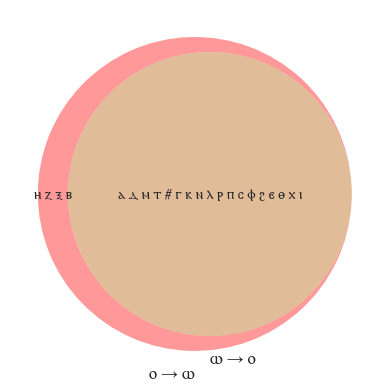

In [22]:
the_input = "ⲟ"
the_output = "ⲱ"

thither = df_diff[(df_diff["input"] == the_input) & (df_diff["output"] == the_output)]
context_thither = set(thither["context_left"].values) | set(thither["context_right"].values)

thence = df_diff[(df_diff["input"] == the_output) & (df_diff["output"] == the_input)]
context_thence = set(thence["context_left"].values) | set(thence["context_right"].values)

v = venn2([context_thither, context_thence], (f"{the_input} → {the_output}", f"{the_output} → {the_input}"))

v.get_label_by_id("10").set_text(" ".join(context_thither - context_thence))
v.get_label_by_id("11").set_text(" ".join(context_thither & context_thence))
v.get_label_by_id("01").set_text(" ".join(context_thence - context_thither))

In [23]:
thence[thence["context_left"] == "ⲡ"]

,greek_lemma,orthography,dialect,date_approximate,operation,input,output,context_left,context_right
id,,,,,,,,,
167412,ⲧⲁⲗⲁⲓⲡⲱⲣⲟⲥ,ⲧⲁⲗⲉⲡⲟⲣⲟⲥ,A,649.0,replace,ⲱ,ⲟ,ⲡ,ⲣ
42552,ⲧⲁⲗⲁⲓⲡⲱⲣⲟⲥ,ⲧⲁⲗⲏⲡⲟⲣⲟⲥ,S,949.0,replace,ⲱ,ⲟ,ⲡ,ⲣ
10643,ϩⲟⲡⲱⲥ,ϩⲟⲡⲟⲥ,F5,949.0,replace,ⲱ,ⲟ,ⲡ,ⲥ
53817,ⲙⲏⲡⲱⲥ,ⲙⲉⲡⲟⲥ,S,1049.0,replace,ⲱ,ⲟ,ⲡ,ⲥ
99415,ⲙⲏⲡⲱⲥ,ⲙⲏⲡⲟⲥ,S,1199.0,replace,ⲱ,ⲟ,ⲡ,ⲥ
26111,ⲙⲏⲡⲱⲥ,ⲙⲏⲡⲟⲥ,S,1099.0,replace,ⲱ,ⲟ,ⲡ,ⲥ
81458,ⲧⲁⲗⲁⲓⲡⲱⲣⲟⲥ,ⲧⲁⲗⲏⲡⲟⲣⲟⲥ,S,1136.5,replace,ⲱ,ⲟ,ⲡ,ⲣ
143038,ⲧⲁⲗⲁⲓⲡⲱⲣⲟⲥ,ⲧⲁⲗⲁⲓⲡⲟⲣⲟⲥ,S,1299.0,replace,ⲱ,ⲟ,ⲡ,ⲣ
65394,ⲙⲏⲡⲱⲥ,ⲙⲏ|ⲡⲟⲥ,S,1324.0,replace,ⲱ,ⲟ,ⲡ,ⲥ
